In [ ]:
#IMPORTANT: RUN THESE ANSWERS CONSECUTIVELY AS SOME ANSWERS OR DEFINITIONS ARE REUSED IN THE FOLLOWING QUESTION
#IF YOU DONT RUN ALL THE CODE BEFORE A CERTAIN PART, YOU MIGHT GET AN ERROR

In [2]:
from os import access
import pandas as pd
import numpy as np
import datetime
from pandas.core.reshape.concat import concat
from datetime import date, datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [78]:
# Reading in the data needed for this question

df_CompanyEmployees = pd.read_csv('./Data/HVC_AM0.csv', sep=";")
df_CompanyEmployees = df_CompanyEmployees.rename(columns= {'AM0_NRID':'Employee_ID', 'EMPLOYEENUMBER': 'EmployeeNumber', 'NAME': 'Name', 'POSTCODE': 'Postcode', 'LOCATION': 'Location', 'LANGUAGE': 'Language' })

df_zipCodes = pd.read_csv("./Data/zipcode-belgium.csv", header=None)
df_zipCodes.columns = ["POSTCODE", "CITY", "LONG", "LAT"]

df_CustomerType = pd.read_csv('./Data/HVC_SO0.csv', sep=";")
df_CustomerType = df_CustomerType.rename(columns={'SO0_NRID': 'Customer_ID', 'HVROUTETEMPLATE_NRID': 'RouteTemplate_ID', 'CUST_TYPE': 'CustomerType', 'POSTCODE': 'Postcode', 'LANGUAGE': 'Language', 'SEASON_TYPE': 'Season'})

df_CompanyVisit = pd.read_csv('./Data/HVC_HVVISITRESULT.csv', sep=";")
df_CompanyVisit = df_CompanyVisit.rename(columns={'HVVISITRESULT_NRID': 'Visit_ID', 'SO0_NRID': 'Customer_ID', 'AM0_NRID': 'Employee_ID', 'HVOUTCOME_NRID': 'VisitOutcome_ID', 'VISITDATE': 'Hour', 'DATEONLY': 'Date', 'AMOUNT':'Amount', 'PAYMENTTERM': 'PaymentMethod'})

df_Products = pd.read_csv('./Data/HVC_AR0.csv', sep=";")
df_Products = df_Products.rename(columns={'AR0_NRID': 'Product_ID', 'DESCRIPTION': 'Description', 'CATEGORY': 'Category', 'FAMILY': 'Family', 'PRICE': 'Price'})

df_VisitDetails = pd.read_csv('./Data/HVC_VISITRESULTDETAILS.csv', sep=";")
df_VisitDetails = df_VisitDetails.rename(columns={'VISITRESULTDETAILS_NRID': 'VisitDetails_ID', 'AR0_NRID': 'Product_ID', 'QUANTITY': 'Quantity', 'HVVISITRESULT_NRID' : 'Visit_ID' })

In [ ]:
###########################
#Q3 Who are the employees?#
###########################

In [15]:
# First we check where our employees live

employees_locations = df_CompanyEmployees.groupby(['Postcode', 'Location'], as_index=False).count().sort_values(by='EmployeeNumber', ascending=False)
employees_locations = employees_locations[['Postcode', 'Location', 'EmployeeNumber']].rename(columns={'EmployeeNumber': 'Count'})

employees_locations

,Postcode,Location,Count
1,2460,Tielen,14
2,3500,Hasselt,4
16,3900,Overpelt,3
0,2400,Mol,2
4,3512,Stevoort,2
18,3920,Lommel,2
12,3690,Zutendaal,1
20,3990,Peer,1
19,3930,Hamont,1
17,3910,Neerpelt,1


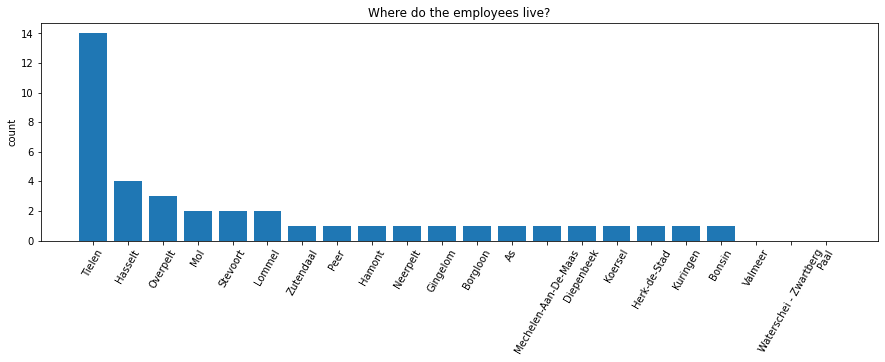

In [16]:
# We can also plot this to see in which cities most of our employees live

y_pos = np.arange(len(employees_locations))

plt.figure(figsize=(15,4))
plt.bar(y_pos, employees_locations['Count'], align = 'center')
plt.xticks(y_pos, employees_locations['Location'], rotation = 60)
plt.ylabel('count')
plt.title("Where do the employees live?")
plt.show()

# We can conclude that most of the people live in Tielen

In [19]:
# We add the longitudes and latitudes to the cities 
employee_locs = pd.DataFrame()

for city in employees_locations['Location']: 
    employee_loc = df_zipCodes[df_zipCodes["CITY"] == city].drop_duplicates()
    employee_locs = employee_locs.append(employee_loc)

employee_locs = employee_locs.rename(columns = {'POSTCODE': 'Postcode'})
employees_locations = employees_locations.merge(employee_locs, how = 'inner', on = 'Postcode')
employees_locations

,Postcode,Location,Count,CITY,LONG,LAT
0,2460,Tielen,14,Tielen,4.896546,51.242259
1,3500,Hasselt,4,Hasselt,5.336838,50.930358
2,3900,Overpelt,3,Overpelt,5.422976,51.211346
3,2400,Mol,2,Mol,5.115527,51.184042
4,3512,Stevoort,2,Stevoort,5.244429,50.916984
5,3920,Lommel,2,Lommel,5.307689,51.230566
6,3690,Zutendaal,1,Zutendaal,5.572555,50.931899
7,3990,Peer,1,Peer,5.449157,51.108740
8,3930,Hamont,1,Hamont,5.531287,51.254585
9,3910,Neerpelt,1,Neerpelt,5.431442,51.228975


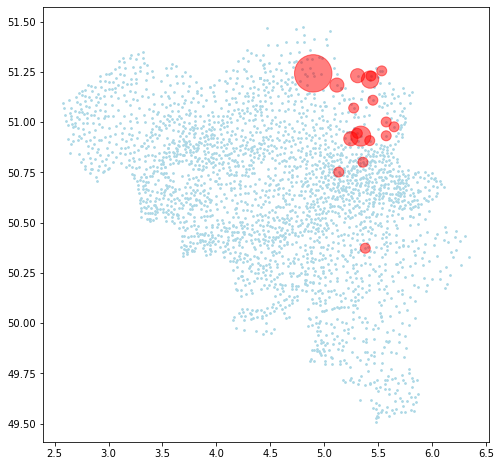

In [20]:
# Now we can also plot our insights on a map of Belgium
# We can do this by plotting a scatterplot (blue) of all the longitudes and latitudes from the zipcode-belgium.csv file to have the shape of Belgium
# And then by adding the cities where our employees live in another color (red)
# The bigger the circle, the more employees live in that specific area
plt.figure(figsize=(8, 8))
plt.scatter(df_zipCodes["LONG"], df_zipCodes["LAT"], s=3, color="lightblue")
plt.scatter(employees_locations["LONG"], employees_locations["LAT"], s= (employees_locations['Count'])*100, color="red", alpha=0.5)


In [22]:
# Now we check what languages our employees speak

employee_languages = df_CompanyEmployees.groupby(['Language']).count()
employee_languages['Language'] = employee_languages.index
employee_languages = employee_languages.rename(columns= {'Employee_ID': 'Count'})
employee_languages = employee_languages[['Count', 'Language']]
employee_languages

,Count,Language
Language,,
fr-BE,1,fr-BE
nl-BE,45,nl-BE


In [23]:
# As a percentage
total = len(df_CompanyEmployees)
print(((employee_languages['Count'])/total)*100)

Language
fr-BE     2.173913
nl-BE    97.826087
Name: Count, dtype: float64


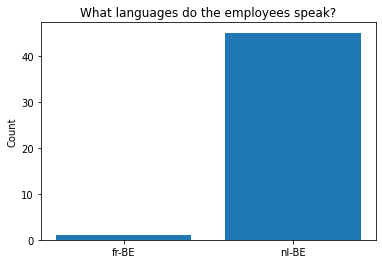

In [24]:
# In a barplot

y_pos = np.arange(len(employee_languages))

plt.figure(figsize=(6,4))
plt.bar(y_pos, employee_languages['Count'], align = 'center')
plt.xticks(y_pos, employee_languages['Language'])
plt.ylabel('Count')
plt.title("What languages do the employees speak?")

plt.show()

# We can see that only 1 employee of the 46 employees talks French
# Converting it into a percentage shows us that only 2,17% of the employees talk French

In [33]:
# Seeing that we only have 1 employee that talks French, it may be interesting to compare this percentage with the percentage of the customers that speak French
# (If there's a big difference, it may be interesting to find more French speaking employees)

customer_languages = df_CustomerType.groupby(['Language']).count()
customer_languages['Language'] = customer_languages.index
customer_languages = customer_languages.rename(columns= {'Customer_ID': 'Count'})
customer_languages = customer_languages[['Count', 'Language']]
customer_languages

,Count,Language
Language,,
fr-BE,6,fr-BE
nl-BE,5703,nl-BE


In [34]:
# As a percentage

total = len(df_CustomerType)
print(((customer_languages['Count'])/total)*100)

Language
fr-BE     0.105097
nl-BE    99.894903
Name: Count, dtype: float64


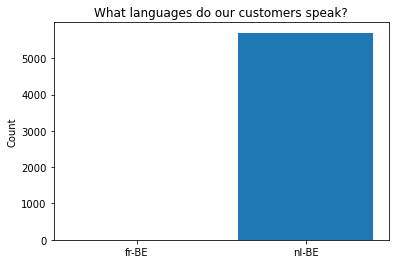

In [35]:
# In a barplot

y_pos = np.arange(len(customer_languages))

plt.figure(figsize=(6,4))
plt.bar(y_pos, customer_languages['Count'], align = 'center')
plt.xticks(y_pos, customer_languages.index)
plt.ylabel('Count')
plt.title("What languages do our customers speak?")

plt.show()

# As we can see, only 0,10% of our customers speak french, which means that we don't need to employ more french speaking employees


In [37]:
# Just to check, but does our french employee really go to those french customers?

french_customers = df_CustomerType[df_CustomerType['Language'] == 'fr-BE']
french_employees = df_CompanyEmployees[df_CompanyEmployees['Language'] == 'fr-BE']


In [38]:
french_customers

,Customer_ID,RouteTemplate_ID,CustomerType,Postcode,Language,Season
3206,5.740486e+07,289662608.0,Private,3500,fr-BE,All time
3207,5.742370e+07,289662608.0,Private,3500,fr-BE,All time
3697,6.695108e+07,289758474.0,Private,3650,fr-BE,All time
4406,5.347486e+07,289417951.0,Private,3550,fr-BE,All time
5066,2.220206e+13,289763484.0,Private,3650,fr-BE,All time
5526,2.519534e+13,219018687.0,Private,3950,fr-BE,All time


In [39]:
french_employees

,Employee_ID,EmployeeNumber,Name,Postcode,Location,Language
25,23254880377036,3346.0,DE BRUYNE Charlotte,5377,Bonsin,fr-BE


In [49]:

employee_customer_visits = df_CompanyEmployees.merge(df_CompanyVisit, how = 'inner', on = 'Employee_ID').merge(df_CustomerType, how = 'inner', on = 'Customer_ID')
visits_by_french_employees = employee_customer_visits[employee_customer_visits['Language_x']=='fr-BE']
visits_to_french_customers = employee_customer_visits[employee_customer_visits['Language_y']=='fr-BE']

print(len(pd.merge(visits_by_french_employees, visits_to_french_customers, left_index=True, right_index=True)))

# The french employee is not assigned to the french customers, which is a problem! They should plan him on those customers!


0


In [64]:
#Q3.1 What are the routes of the employees?
# First we merge df_CompanyVisit and df_CustomerType on the key Customer_ID

df_routesWithEmployees = pd.merge(df_CompanyVisit, df_CustomerType, how = "inner", on = "Customer_ID")

df_routesWithEmployees = df_routesWithEmployees[['Employee_ID', 'RouteTemplate_ID']].drop_duplicates()

df_routesWithEmployees = df_routesWithEmployees.sort_values(by = ['Employee_ID'])

df_routesWithEmployees

,Employee_ID,RouteTemplate_ID
164408,18503648417252,289661606.0
395,18821748667448,219019324.0
48550,18934048107254,289413943.0
112840,18934048107254,289657598.0
88369,18934048107254,289414945.0
...,...,...
5608,25532744515046,289762482.0
97201,25532744515046,219021882.0
88355,25532744515046,289759476.0
237725,25532744515046,219019324.0


In [112]:
# Here we make a complete price frame containing: VisitID's, corresponding Customer_ID's and the corresponding Product_ID's bought during those visits for visitdetails (which products bought)
# This will be needed for calculating the turnover in the next block

df_SeasonPrep = pd.merge(df_CompanyVisit, df_VisitDetails, how="left", on="Visit_ID")

#Now for product info
df_CompletePriceFrame = pd.merge(df_SeasonPrep, df_Products, how="left", on="Product_ID").dropna()

#What revenue is gained for each single product during a single visit
df_CompletePriceFrame["RevenueProduct"] = df_CompletePriceFrame["Quantity"]*df_CompletePriceFrame["Price"]

#Drop unneeded columns
df_CompletePriceFrame = df_CompletePriceFrame.drop(columns=["Hour","PaymentMethod"])

df_CompletePriceFrame

,Visit_ID,Customer_ID,Employee_ID,VisitOutcome_ID,Date,Amount,VisitDetails_ID,Product_ID,Quantity,Description,Category,Family,Price,RevenueProduct
0,55681456,719952,23186288605042,2,2019-05-06,16.9,55681457.0,2.367800e+04,1.0,"2,5 L.Vanille",Verkoopsartikel,Scoop Ice,7.4,7.4
1,55681456,719952,23186288605042,2,2019-05-06,16.9,55681458.0,1.745386e+13,1.0,Cornets d'Amour BrÃ©s 16+4,Verkoopsartikel,Hand Ice,9.5,9.5
2,55681507,1453609,19946584592834,2,2019-05-06,7.4,55681508.0,2.367800e+04,1.0,"2,5 L.Vanille",Verkoopsartikel,Scoop Ice,7.4,7.4
3,55681509,1453614,19946584592834,2,2019-05-06,18.9,55681510.0,2.174416e+13,2.0,Donuts Deluxe,Verkoopsartikel,Coffee,5.2,10.4
4,55681509,1453614,19946584592834,2,2019-05-06,18.9,55681511.0,2.373400e+04,1.0,Maxi Vanille/24,Verkoopsartikel,Hand Ice,8.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288316,68567457,1402786,24034952445848,2,2020-06-28,7.3,68567459.0,2.029629e+13,1.0,Expo met zachte wafel/12,Verkoopsartikel,Individual Dessert,7.3,7.3
288317,68814039,722763,20624864486850,2,2020-07-05,7.5,68814040.0,2.376000e+04,1.0,Mini Bigs /12,Verkoopsartikel,Hand Ice,7.5,7.5
288318,68688417,1252549,18934048107254,2,2020-06-30,15.5,68688418.0,8.609011e+06,1.0,"Vanille 2,5L + 0,5L gratis",Verkoopsartikel,Scoop Ice,7.4,7.4
288319,68688417,1252549,18934048107254,2,2020-06-30,15.5,68688419.0,2.373600e+04,1.0,Minichoc Vanille/32,Verkoopsartikel,Hand Ice,8.1,8.1


In [114]:
#Q3.2 What is the turnover for each employee?
# Total

salesHappened = df_CompletePriceFrame[df_CompletePriceFrame['VisitOutcome_ID']==2]
salesHappened["Date"] = pd.to_datetime(salesHappened["Date"])
salesPerEmployee = salesHappened.groupby(['Employee_ID'], as_index= False)['Price'].sum()
salesPerEmployee = salesPerEmployee.sort_values(by = "Price", ascending=False)
salesPerEmployee = salesPerEmployee.rename(columns= {'Price': 'Turnover'})

salesPerEmployee = salesPerEmployee.merge(df_CompanyEmployees, how = 'inner', on = 'Employee_ID')

salesPerEmployee = salesPerEmployee[['Name', 'Turnover']]

salesPerEmployee.to_csv('/Users/anbouckaert/Downloads/salesperemployee.csv')

salesPerEmployee

,Name,Turnover
0,VAN HECKE jan,254484.50
1,PEETERS michel,238142.45
2,BUFFEL Sandy,168118.15
3,VERRESEN Dirk,84362.55
4,VERSTRAETE Erik,48427.65
5,MATTIJS stijn,43707.65
6,DE PAUW Kim,41163.30
7,KERCKAERT Pieter,18551.55
8,CLAUS David,14980.15
9,BALLINGS Hendrik,8552.20


In [115]:
# Now only for the year 2020

salesHappened2020 = salesHappened[salesHappened['Date'].dt.year == 2020]
salesPerEmployee2020 = salesHappened2020.groupby(['Employee_ID'], as_index= False)['Price'].sum()
salesPerEmployee2020 = salesPerEmployee2020.sort_values(by = "Price", ascending=False)
salesPerEmployee2020 = salesPerEmployee2020.rename(columns= {'Price': 'Turnover'})

salesPerEmployee2020 = salesPerEmployee2020.merge(df_CompanyEmployees, how = 'inner', on = 'Employee_ID')

salesPerEmployee2020 = salesPerEmployee2020[['Name', 'Turnover']]

salesPerEmployee2020.to_csv('/Users/anbouckaert/Downloads/salesperemployee2020.csv')

salesPerEmployee2020

,Name,Turnover
0,PEETERS michel,130312.90
1,VAN HECKE jan,121714.80
2,BUFFEL Sandy,106949.10
3,VERSTRAETE Erik,48427.65
4,DE PAUW Kim,29904.30
5,CLAUS David,14980.15
6,TACK Hann,5974.15
7,VAN HUFFEL Jan,4781.00
8,PAUWELS Jeffrey,3588.85
9,KERCKAERT Pieter,2174.85


In [120]:
# Now we check the sales rate of each of the employees by dividing the number of visits with an outcome of 2 with all the visits that the employee has done

df_employeeVisitResults = df_CompanyEmployees.merge(df_CompanyVisit, how="inner", on = 'Employee_ID')
salesHappened2 = df_employeeVisitResults[df_employeeVisitResults['VisitOutcome_ID']==2]

visitsPerEmployee = df_employeeVisitResults.groupby(['Employee_ID', 'Name'], as_index=False).count()
visitsPerEmployee = visitsPerEmployee[['Employee_ID', 'Name', 'Amount']]
visitsPerEmployee = visitsPerEmployee.sort_values(by = 'Employee_ID')
visitsPerEmployee = visitsPerEmployee.rename(columns={'Amount': 'Total_visits'})

successVisitsPerEmployee = salesHappened2.groupby(['Employee_ID', 'Name'], as_index=False).count()
successVisitsPerEmployee = successVisitsPerEmployee[['Employee_ID', 'Name', 'Amount']]
successVisitsPerEmployee = successVisitsPerEmployee.sort_values(by = 'Employee_ID')
successVisitsPerEmployee = successVisitsPerEmployee.rename(columns={'Amount': 'Success_visits'})


employeeTurnoverRate = pd.merge(visitsPerEmployee, successVisitsPerEmployee, how = "inner", on = "Employee_ID")
employeeTurnoverRate['Percentage'] = (employeeTurnoverRate['Success_visits']/employeeTurnoverRate['Total_visits'])*100
employeeTurnoverRate = employeeTurnoverRate.sort_values(by='Success_visits', ascending=False)
employeeTurnoverRate = employeeTurnoverRate[['Employee_ID', 'Name_x', 'Success_visits', 'Percentage']]

employeeTurnoverRate



,Employee_ID,Name_x,Success_visits,Percentage
2,18934048107254,VAN HECKE jan,21188,38.954258
3,19946584592834,PEETERS michel,18547,34.882453
14,24034952445848,BUFFEL Sandy,15003,34.097727
11,23186288605042,VERRESEN Dirk,7064,31.076503
26,25146868694050,VERSTRAETE Erik,4227,22.286076
5,20126680425436,MATTIJS stijn,3535,39.225477
21,24705284396450,DE PAUW Kim,3503,21.385836
13,23845760556442,KERCKAERT Pieter,1665,26.610197
24,24871084536436,CLAUS David,1188,26.358997
4,20023764336850,BALLINGS Hendrik,630,40.050858
